In [ ]:
#IN THIS PROJECT I WANT TO MAKE A LINE CHART OF THE MOST IN DEMAND JOBS IN THE US
#DURING EACH MONTH BUT ALSO WANT TO SHOW THE TOP THREE JOBS IN DIFFERENT LINES


In [1]:
#Importing Libraries 

import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset

#Loading Data 

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data Cleanup 

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [2]:
df_us = df[df['job_country'] == 'United States'].copy()

In [3]:
df_us.head(3)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
5,Data Engineer,GCP Data Engineer,Anywhere,via ZipRecruiter,Contractor and Temp work,True,Georgia,2023-11-07 14:01:59,False,False,United States,None,NaN,NaN,smart folks inc,"['python', 'sql', 'gcp']","{'cloud': ['gcp'], 'programming': ['python', '..."


In [4]:
len(df_us)

206292

In [5]:
#First step is I want to remove any values that are duplicates 

unique_df = df_us.drop_duplicates()

len(unique_df)

206287

In [6]:
#Now I want to remove jobs that are the same job but posted on different job boards 

unique_df = df_us.drop_duplicates(['job_title','company_name'])

len(unique_df)

127829

In [ ]:
#Now i want to make a new column in my dataframe of the month each job was posted

unique_df['month'] = unique_df['job_posted_date'].dt.strftime('%B')
unique_df.head(3)

C:\Users\mitta\AppData\Local\Temp\ipykernel_18772\3664326755.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_df['month'] = unique_df['job_posted_date'].dt.strftime('%B')


,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,month
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None,June
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',...",July
5,Data Engineer,GCP Data Engineer,Anywhere,via ZipRecruiter,Contractor and Temp work,True,Georgia,2023-11-07 14:01:59,False,False,United States,None,NaN,NaN,smart folks inc,"['python', 'sql', 'gcp']","{'cloud': ['gcp'], 'programming': ['python', '...",November


In [8]:
#Now i want to make a pivot table

df_pivot = unique_df.pivot_table(index='month', columns='job_title_short',aggfunc='size')
df_pivot
#unfortunately the months are not in the right order

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
month,,,,,,,,,,
April,486,36,3607,1681,2531,41,605,427,469,103
August,769,35,4130,2045,3343,53,752,508,841,169
December,567,40,2838,1814,2267,98,463,429,486,199
February,357,20,3679,1856,2682,51,700,496,589,70
January,447,30,5250,1725,3931,57,971,432,870,99
July,493,36,3268,1625,2654,55,551,445,611,133
June,380,30,3374,1825,2530,39,565,491,575,74
March,366,19,3764,2007,2592,53,683,488,615,92
May,243,18,2865,1787,2267,41,497,453,464,83


In [9]:
df_pivot.reset_index(inplace=True)
df_pivot['month_no'] = pd.to_datetime(df_pivot['month'], format='%B').dt.month
df_pivot

job_title_short,month,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer,month_no
0,April,486,36,3607,1681,2531,41,605,427,469,103,4
1,August,769,35,4130,2045,3343,53,752,508,841,169,8
2,December,567,40,2838,1814,2267,98,463,429,486,199,12
3,February,357,20,3679,1856,2682,51,700,496,589,70,2
4,January,447,30,5250,1725,3931,57,971,432,870,99,1
5,July,493,36,3268,1625,2654,55,551,445,611,133,7
6,June,380,30,3374,1825,2530,39,565,491,575,74,6
7,March,366,19,3764,2007,2592,53,683,488,615,92,3
8,May,243,18,2865,1787,2267,41,497,453,464,83,5
9,November,629,34,2994,1901,2654,117,474,460,529,164,11


In [13]:
df_pivot.sort_values('month_no', inplace=True)
df_pivot.set_index('month',inplace=True)

In [14]:
df_pivot.drop(columns='month_no', inplace=True)
df_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
month,,,,,,,,,,
January,447,30,5250,1725,3931,57,971,432,870,99
February,357,20,3679,1856,2682,51,700,496,589,70
March,366,19,3764,2007,2592,53,683,488,615,92
April,486,36,3607,1681,2531,41,605,427,469,103
May,243,18,2865,1787,2267,41,497,453,464,83
June,380,30,3374,1825,2530,39,565,491,575,74
July,493,36,3268,1625,2654,55,551,445,611,133
August,769,35,4130,2045,3343,53,752,508,841,169
September,807,46,3202,2190,2804,98,572,493,589,190


<Axes: xlabel='month'>

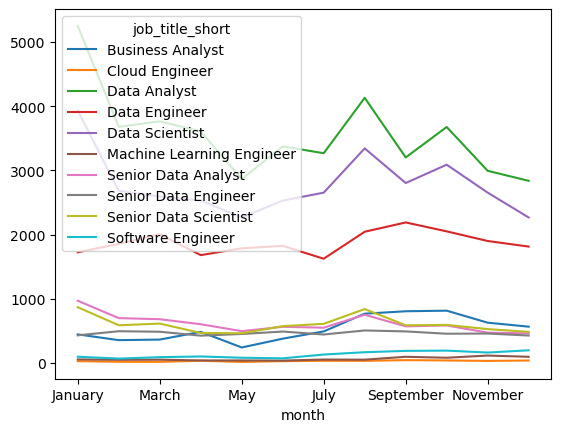

In [ ]:
#Now i know the plot works but I want to only show the top 3 jobs
df_pivot.plot(kind='line')

In [22]:
#Creating a variable to store the top 3 jobs based on counts 

top_3 = unique_df['job_title_short'].value_counts().head(3)
top_3 = top_3.index.tolist()
top_3

['Data Analyst', 'Data Scientist', 'Data Engineer']

Text(0.5, 1.0, 'Job Postings by Month for Major Data Jobs')

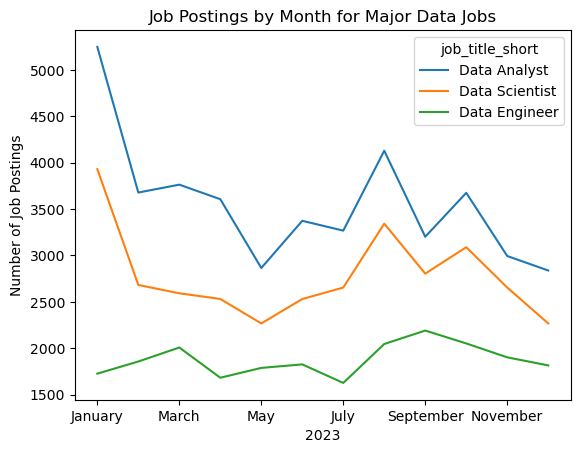

In [24]:
df_pivot[top_3].plot(kind='line')
plt.xlabel('2023')
plt.ylabel('Number of Job Postings')
plt.title('Job Postings by Month for Major Data Jobs')